# Dataset
The dataset analyzed in 7A_fractured of a shale sample

## Sample properties
- hape: cylindrical
- height: 
- diameter: 
- lithology:

# Blob3D fracture measurement

## Measuring the PSF
Measuring the Point Spread Function is a manual process, whereby line segments (traverses) are drawn across the transition from air to the rock matrix. The data file `7A-fractured-psf.dat` that is loaded in the [cell](#Loading-the-PSF-file) linked here. The column `Mdpt. Z (vox)` indicates the slice number on which the PSF was measured.

## Determining the gray value for the fracture core
We chose a slice where to estimate the gray value of the fracture core as shown in the images below.


<img src="images/7A-fracture core gray value zoomed out.png" alt="fracture core gray value slice"/>
<img src="images/7A-fracture core gray value.png" alt="fracture core gray value mean"/>

The estimated gray value for air inside the fracture was estimated to be **~10**.

### Measuring the fracture
To measure the fracture, linear traverses were placed across the primary fracture, and an automatic tracer was activated. The tracer moves the linear traverse along the fracture and takes a fracture aperture measurment with every step. These measurements are then saved into a text file. We did that repeatedly on different locations of the data. The fracture tracing sometimes would stop whenever there is a significant change the the fracture topology. See image below. This is a known issue with the tracer, but it does not degrage the quality of the acquired data.


<img src="images/slice 1184 abrupt change in fracture topology.png" alt="abrupt change in fracture topology" style="zoom:50%;" />

# Correlating the fracture measurement to permeability
So while reading (Zimmerman et al. 1996), I am realizing the that cubic law of Transmissevity $T = \frac{wa^3}{12}$, where $w~=$ is the width of the fracture, $a~=$ is the fracture aperature,that results in the permeability to be $k=\frac{a^2}{12}$ is insuffecient to estimate permeability. But since we have a statistical distribution of the fracture aperture, we might be able to produce a more robust result. I just haven't completely completely finish reading the paper yer

## References
- Zimmerman, Robert W., and Gudmundur S. Bodvarsson. "Hydraulic conductivity of rock fractures." Transport in porous media 23.1 (1996): 1-30.
- [Creating steronets using Python](http://geologyandpython.com/structural_geology.html)

## Loading the PSF file

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

psf_results_folder = os.path.join('.','results','runs','20220208')
psf_file = os.path.join(psf_results_folder,'7A-fractured-psf.dat')
psf_df = pd.read_table(psf_file)
psf_df.head()

,No.,View,Mdpt. X (vox),Mdpt. Y (vox),Mdpt. Z (vox),Mean PSF Radius (vox),St. Dev. (vox),Incident Angle (deg),Radial Distance (vox),Tangent Angle (deg)
0,1,Ortho Z,442.16,778.70,100.0,3.60,0.41,6.07,380.59,0.16
1,2,Ortho Z,496.94,767.73,100.0,3.66,0.32,2.66,380.78,3.08
2,3,Ortho Z,551.64,747.68,100.0,3.84,0.37,3.15,380.42,2.92
3,4,Ortho Z,628.91,700.49,100.0,2.83,0.46,19.74,380.29,5.87
4,5,Ortho Z,699.98,626.03,100.0,3.07,0.47,1.16,379.41,1.32


In [10]:
psf_stats = psf_df.describe()
#psf_stats.head()
print(psf_stats.loc['mean','Mean PSF Radius (vox)'])

3.3856097560975615


## Fracture measurements
There are 1910 slices in this microCT volume. So in order to systematically measure the fracture, we choose 25 slices in the middle to measure the fracture. See cell output below. In addition, when the fracture biforcates, we have consistently chosen only the left branch of the fracture. 

<img src="images/bifurcating fracture.png" alt="bifurcating fracture" />

In [13]:
target_slices = np.linspace(100,1910-100,25,dtype='int')
print(target_slices)

[ 100  171  242  313  385  456  527  598  670  741  812  883  955 1026
 1097 1168 1240 1311 1382 1453 1525 1596 1667 1738 1810]


We used a PSF of **3.38**, and a Thin feature CT value of **10**

In [51]:
completed_slice_num = 1810

print('completed slices = ',target_slices[target_slices <= completed_slice_num])
print('remainig slices = ',target_slices[target_slices > completed_slice_num])
print('remainig slice count = ',len(target_slices[target_slices > completed_slice_num]))

completed slices =  [ 100  171  242  313  385  456  527  598  670  741  812  883  955 1026
 1097 1168 1240 1311 1382 1453 1525 1596 1667 1738 1810]
remainig slices =  []
remainig slice count =  0


In [54]:
frac_results_folder = os.path.join('.','results','runs','20220208')
frac_file  = os.path.join(frac_results_folder,'7A-fractured-fracture measurements.dat')

print('loaded data from ' + frac_file)

frac_df = pd.read_table(frac_file)
frac_df.head()

loaded data from .\results\runs\20220208\7A-fractured-fracture measurements.dat


,Name,Merit,View,Midpoint X (vox),Midpoint Y (vox),Midpoint Z (vox),Apparent Width (vox),Apparent Width (mm),Incident Angle (deg),Corrected Width (vox),Corrected Width (mm),Tile Mean App. Width (vox),Tile SD App. Width (vox),Tile Mean Corr. Width (vox),Tile Mean Corr. Width (mm),Feature Normal X,Feature Normal Y,Feature Normal Z
0,Trav0,0.022378,Ortho Z,347.363,735.386,100.0,1.027770,0.034225,20.0568,0.965436,0.032149,1.17152,0.081513,1.10047,0.036646,0.875356,0.441600,-0.196831
1,Trav1,0.022378,Ortho Z,347.363,735.386,100.0,1.027770,0.034225,20.0568,0.965436,0.032149,1.17152,0.081513,1.10047,0.036646,0.875356,0.441600,-0.196831
2,Trace2,0.009541,Ortho Z,346.309,734.854,100.0,1.149950,0.038294,16.9377,1.100070,0.036632,1.17297,0.092605,1.12208,0.037365,0.930161,0.280086,-0.237385
3,Trace2,0.030704,Ortho Z,346.087,733.448,100.0,1.091410,0.036344,10.9597,1.071510,0.035681,1.14877,0.078237,1.12782,0.037556,0.856785,0.479547,-0.189614
4,Trace2,0.038408,Ortho Z,347.460,732.977,100.0,0.954655,0.031790,20.8355,0.892226,0.029711,1.08902,0.141471,1.01781,0.033893,0.859539,0.413089,-0.300915


In [55]:
frac_df.describe()

,Merit,Midpoint X (vox),Midpoint Y (vox),Midpoint Z (vox),Apparent Width (vox),Apparent Width (mm),Incident Angle (deg),Corrected Width (vox),Corrected Width (mm),Tile Mean App. Width (vox),Tile SD App. Width (vox),Tile Mean Corr. Width (vox),Tile Mean Corr. Width (mm),Feature Normal X,Feature Normal Y,Feature Normal Z
count,17348.000000,17348.00000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000
mean,0.019473,418.68706,410.138477,960.991016,2.601314,0.086624,13.763489,2.494605,0.083070,2.614098,0.187333,2.507001,0.083483,0.916796,0.146080,-0.022037
std,0.046238,37.19719,195.440786,501.167691,1.103479,0.036746,10.000079,1.074027,0.035765,1.093952,0.118319,1.066057,0.035500,0.119420,0.231959,0.263823
min,0.000078,341.70700,26.606800,100.000000,0.000000,0.000000,0.047852,0.000000,0.000000,0.271671,0.033009,0.016049,0.000534,-0.706937,-0.699181,-0.706267
25%,0.005499,388.39075,245.037500,527.000000,1.786830,0.059501,6.271348,1.707213,0.056850,1.800438,0.123149,1.714240,0.057084,0.892880,-0.010401,-0.217772
50%,0.010399,418.72600,409.862000,955.000000,2.480560,0.082603,11.826550,2.380025,0.079255,2.486325,0.163482,2.389305,0.079564,0.942608,0.150477,-0.024846
75%,0.019522,451.92600,576.394250,1382.000000,3.239383,0.107872,19.121125,3.120232,0.103904,3.247430,0.219494,3.127502,0.104146,0.975477,0.306674,0.159126
max,0.955042,502.56500,777.140000,1810.130000,7.711880,0.256806,89.088900,6.636420,0.220993,7.026070,4.745170,6.535970,0.217648,0.999993,0.999880,0.878642


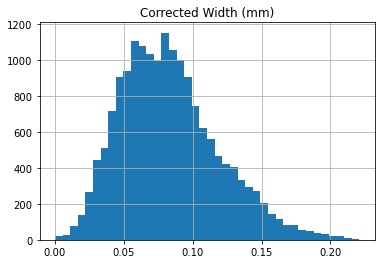

In [56]:
frac_df[['Corrected Width (mm)']].hist(bins=40);

In [31]:
frac_df[['Corrected Width (mm)']].hist(bins=40);

,Corrected Width (mm)
count,228.000000
mean,0.129246
std,0.011588
min,0.082546
25%,0.124946
50%,0.131047
75%,0.136821
max,0.153990


### Carolyn's results
```
Confining Pressure                        Perm (m2)	                  error (+/-)	
20 MPa                                1.1281E-16	2.8992E-18	
30 MPa                                2.1728E-17	5.4409E-19	
50 MPa                                5.0287E-18	1.4249E-19
```

In [28]:
experiment_data = {'Pc': [20, 30, 50], 'k':[1.128e-16, 2.172e-17,5.029e-18], 'error':[2.899e-18,5.441e-19,1.425e-19]}

perm_df = pd.DataFrame(experiment_data)
perm_df.head()

,Pc,k,error
0,20,1.128000e-16,2.899000e-18
1,30,2.172000e-17,5.441000e-19
2,50,5.029000e-18,1.425000e-19


In [30]:
apr_mean = 0.129246e-3
perm = apr_mean**2/12
print(perm)

1.3920440429999997e-09
